# 探索性分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings

warnings.filterwarnings("ignore")

# plt 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 查看 Excel 数据
root = "../data/"
filenames = [i for i in os.listdir(root) if "xlsx" in i]
filenames

['~$疾病记录(2021年10月09日).xlsx',
 '反刍数据0901-0915.xlsx',
 '反刍数据0916-0930.xlsx',
 '泌乳数据 2021_10_9 16-41-26.xlsx',
 '活动数据20210901-20210915.xlsx',
 '活动数据20210916-20210930.xlsx',
 '疾病记录(2021年10月09日).xlsx']

In [3]:
# 查看疾病数据
cols_dis = [
    "管理号",
    "疾病分类",
    "发病日期",
    "治愈日期",
    "治疗结果",
    "发病时泌乳状态",
    "发病时在胎天数",
    "发病时泌乳天数",
    "发病时月龄",
]
disease = pd.read_excel(os.path.join(root, "疾病记录(2021年10月09日).xlsx"), usecols=cols_dis)

In [4]:
disease.drop(columns=["发病时泌乳天数"], inplace=True)
disease.shape

(427, 8)

In [5]:
disease["发病日期"] = disease["发病日期"].astype(np.datetime64)

In [6]:
disease = disease[disease["治愈日期"] != "尚未治愈"]

In [7]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 420
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   管理号      383 non-null    int64         
 1   疾病分类     383 non-null    object        
 2   发病日期     383 non-null    datetime64[ns]
 3   治愈日期     383 non-null    object        
 4   治疗结果     383 non-null    object        
 5   发病时泌乳状态  383 non-null    object        
 6   发病时在胎天数  383 non-null    int64         
 7   发病时月龄    383 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 26.9+ KB


In [8]:
disease["治愈日期"] = disease["治愈日期"].astype(np.datetime64)

## 2. 泌乳数据

In [9]:
cln = pd.read_excel(os.path.join(root, "泌乳数据 2021_10_9 16-41-26.xlsx"))

In [10]:
cols_cln = ["牛号", "日产量", "日期", "日活动量", "日反刍量", "泌乳天数", "泌乳期"]
cln = cln[cols_cln]

In [11]:
cln.head()
cln.dropna(inplace=True)

In [12]:
cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210285 entries, 43 to 248865
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   牛号      210285 non-null  int64         
 1   日产量     210285 non-null  float64       
 2   日期      210285 non-null  datetime64[ns]
 3   日活动量    210285 non-null  float64       
 4   日反刍量    210285 non-null  float64       
 5   泌乳天数    210285 non-null  int64         
 6   泌乳期     210285 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 12.8 MB


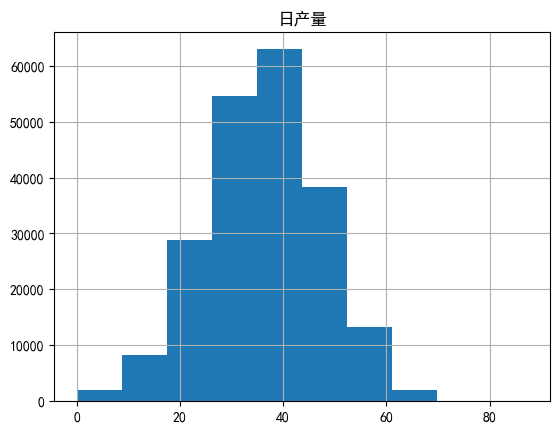

In [13]:
cln[["日产量"]].hist()
plt.show()

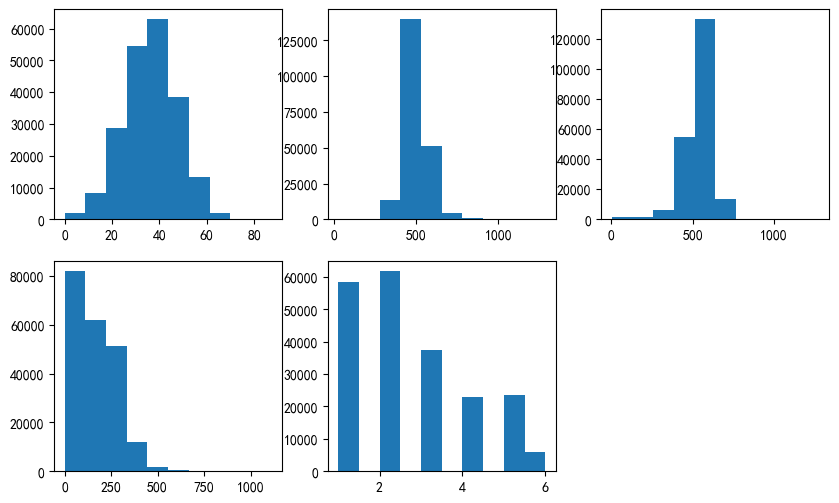

In [14]:
line_num = 3
dis_cols = ["日产量", "日活动量", "日反刍量", "泌乳天数", "泌乳期"]
plt.figure(figsize=(10, 6))

for i in range(1, len(dis_cols) + 1):
    plt.subplot(2, line_num, i)
    plt.hist(cln[dis_cols[i - 1]])
plt.show()

In [15]:
disease.shape, cln.shape

((383, 8), (210285, 7))

### 合并数据

In [16]:
cln.head()

,牛号,日产量,日期,日活动量,日反刍量,泌乳天数,泌乳期
43,6443,4.636000,2021-02-13,408.0,250.0,0,5
44,6443,10.924000,2021-02-14,419.0,309.0,1,5
45,6443,12.796000,2021-02-15,386.0,450.0,2,5
46,6443,18.781000,2021-02-16,391.0,234.0,3,5
47,6443,25.658001,2021-02-17,415.0,364.0,4,5


In [17]:
disease.head()

,管理号,疾病分类,发病日期,治愈日期,治疗结果,发病时泌乳状态,发病时在胎天数,发病时月龄
0,160122,乳房疾病,2021-03-01,2021-03-01,治愈,干奶,219,57.60
1,180299,乳房疾病,2021-03-01,2021-03-01,治愈,干奶,219,33.09
2,170473,生殖系统,2021-03-02,2021-03-20,治愈,泌乳,0,39.61
3,170493,消化系统,2021-03-03,2021-03-06,治愈,泌乳,0,38.59
4,160039,自定义疾病,2021-03-07,2021-03-07,治愈,干奶,219,58.55


In [18]:
data = pd.merge(
    disease, cln, left_on=["管理号", "发病日期"], right_on=["牛号", "日期"], how="right"
)

In [19]:
# data[data['管理号'].notnull()]

data.drop(columns=["管理号", "发病时泌乳状态", "治疗结果"], inplace=True)

In [20]:
data.head()

,疾病分类,发病日期,治愈日期,发病时在胎天数,发病时月龄,牛号,日产量,日期,日活动量,日反刍量,泌乳天数,泌乳期
0,NaN,NaT,NaT,NaN,NaN,6443,4.636000,2021-02-13,408.0,250.0,0,5
1,NaN,NaT,NaT,NaN,NaN,6443,10.924000,2021-02-14,419.0,309.0,1,5
2,NaN,NaT,NaT,NaN,NaN,6443,12.796000,2021-02-15,386.0,450.0,2,5
3,NaN,NaT,NaT,NaN,NaN,6443,18.781000,2021-02-16,391.0,234.0,3,5
4,NaN,NaT,NaT,NaN,NaN,6443,25.658001,2021-02-17,415.0,364.0,4,5
